(512, 512, 3)
(512, 512)


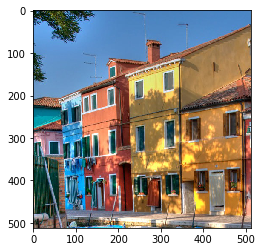

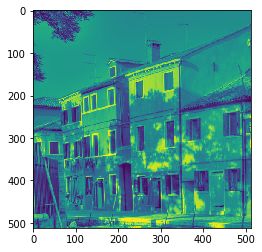

In [1]:
from scipy import misc
f = misc.imread('house.png', flatten=False, mode='RGB')
f_prime =misc.imread('house.png',flatten=False, mode= 'F')

f = f/255

print(f.shape)
print(f_prime.shape)
import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

plt.imshow(f_prime)
plt.show()

In [19]:
import numpy as np 



In [20]:
from numpy.fft import fft2, fft 
freq_tf2 = np.fft.fft2(f_req)
freq_tf1 = np.fft.fft(f_req)
print(freq_tf1.shape , freq_tf2.shape)


(512, 512) (512, 512)


In [14]:
import cmath
import math
from numpy.fft import fft2, fft ,ifft2

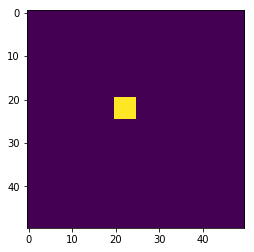

In [30]:
img = np.zeros((50, 50))
img[20:25, 20:25]=1
plt.imshow(img)
plt.show()

In [56]:
def translation_1d (u , to1 ):
    u_tf = np.fft.fft(u)
    tr= np.zeros( u.shape, dtype =complex)
    dim1 = len(u)
    for x in range(int(dim1)):
        tr[x] = interpolation_1d(u_tf, to1, x  )
    return tr

def c_exp( arg):
    return cmath.rect(1, arg)

def interpolation_1d(u_tf, to1,  x):
    somme = 0 
    #dim1, dim2 = u_tf.shape
    dim1 =len(u_tf)
    
    zero=[0]
    for k in range(0,int(dim1/2)+1):
        
        
        somme = somme + u_tf[k]* c_exp(-2*math.pi*((k/(dim1))*to1))* c_exp(2*math.pi*((k*x*1/(dim1))))

    for k in list(range(int(dim1/2)+1, dim1))   :
        somme = somme + u_tf[k]* c_exp(-2*math.pi*(((k-dim1)/(dim1))*to1))* c_exp(2*math.pi*(((k-dim1)*x*1/(dim1))))

    

    
    
    
    return somme



In [ ]:
#ALGO DE ROTATION TRANSLATION 1D SUCCESSIVES SUR VECTEURS COLONNES ET LIGNES

D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


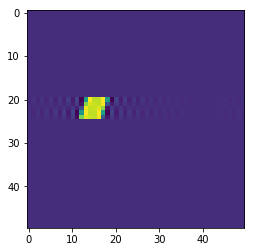

D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


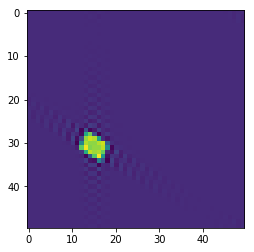

D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


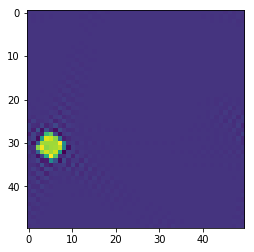

In [73]:
def prim_t(u, theta):
    
    tr = np.zeros(u.shape)
    for i in range(len(u)):
        tr[i,: ] = translation_1d(u[i, :] ,-i*np.tan(theta/2) )
    plt.imshow(tr.real)
    plt.show()
    u =tr 
    for i in range(len(u)):
        tr[:,i ] = translation_1d(u[: , i] , i*np.sin(theta))
        u[:,i]= tr[:,i]
    
    plt.imshow(u.real)
    plt.show()
        
    for i in range(len(u)):
        tr[i,: ] = translation_1d(u[i,:] ,-i*np.tan(theta/2) )
        u[i, :]= tr[i, :]
    
    plt.imshow(u.real)
    plt.show()
    
    return u 
    
    
    
essai = prim_t(img, math.pi/5)

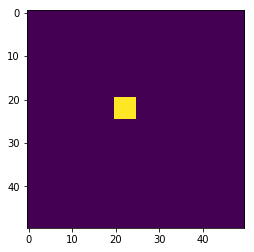

In [72]:
img = np.zeros((50, 50))
img[20:25, 20:25]=1

plt.imshow(img)
plt.show()

In [ ]:
#Laplacien 
#pour Laplacien2(u) méthode trouver ici
http://www.optique-ingenieur.org/fr/cours/OPI_fr_M04_C05/co/Contenu_08.html


In [16]:
def gradient(u):
    grad_x = u[0 :-1, :]- u[1 :, :]
    grad_y= u[:,0:-1]- u[:,1 :]
    magnitude = np.power(np.power(grad_x[:,:-1],2)+np.power(grad_y[:-1,:],2), 1/2)
    return grad_x, grad_y , magnitude

def Laplacien(grad_x, grad_y):
    grad2_x = grad_x[0 :-1, :] -grad_x[1 :, :]
    grad2_y = grad_y[:,0:-1]- grad_y[:,1 :]
    return grad2_x, grad2_y

def Laplacien1(u):
    grad_x , grad_y , magnitude  = gradient(u)
    grad2_x = grad_x[0 :-1, :] -grad_x[1 :, :]
    grad2_y = grad_y[:,0:-1]- grad_y[:,1 :]
    return grad2_x, grad2_y
    
def Laplacien2(u):
    lap= np.zeros((u.shape))
    #print(u.shape)
    dim1, dim2 = u.shape
    for x in range(1,dim1-1):
        for y in range(1,dim2-1):
                lap[x,y] =u[x+1,y]+  u[x-1,y ] + u[x, y-1]+u[x, y+1]- 4*u[x,y]
    lap= lap[1:-1,1:-1]
    #plt.imshow(lap)
    #plt.show()
    return lap




def algo( u, epsilon):
  
    for p  in range(10):

        Lap = Laplacien2(u)
        u = u[1:-1,1:-1]
        u = u - epsilon *Lap

    plt.imshow(u)
    plt.show()
   
        
    return u 
        
    

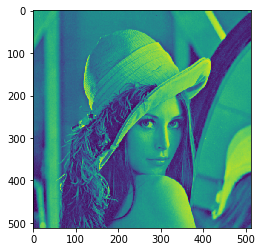

Laplacien


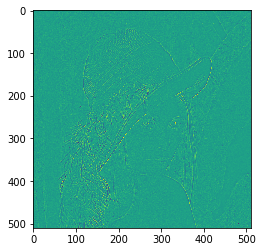

algo soustraction laplacien


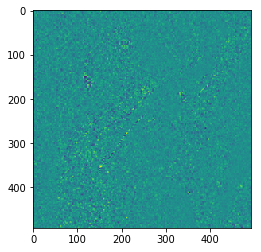

array([[  2.45899378e+06,  -5.15707132e+06,   6.82839767e+06, ...,
         -9.99404671e+05,  -2.43386084e+06,   3.02305981e+06],
       [ -2.90366474e+06,   5.16508660e+06,  -5.84297563e+06, ...,
          4.55627419e+06,  -7.91021906e+05,  -1.91974118e+06],
       [  2.26868125e+06,  -3.99249371e+06,   4.34181920e+06, ...,
         -7.32481933e+06,   3.90605555e+06,   3.40340353e+05],
       ..., 
       [  1.21723840e+07,  -9.52241567e+06,   4.62042045e+06, ...,
         -2.70702244e+06,   4.99459415e+06,  -4.33513449e+06],
       [ -8.88581367e+06,   3.32062825e+06,   3.65788052e+06, ...,
          1.78457663e+06,  -5.91103529e+05,   6.88472157e+03],
       [  4.39448659e+06,   3.14069625e+06,  -1.00416199e+07, ...,
         -3.37129858e+06,  -5.31587702e+05,   1.62010906e+06]])

In [18]:

femme = f =misc.imread('lena.bmp',flatten=False, mode= 'RGB')
femme= femme / 255
femme = np.mean(femme,axis=2)
plt.imshow(femme)
plt.show()
print("Laplacien")
plt.imshow(Laplacien2(femme))
plt.show()
print("algo soustraction laplacien")
algo(femme,1)


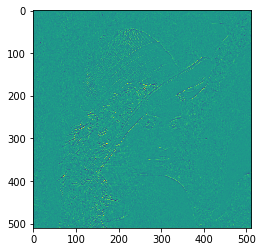

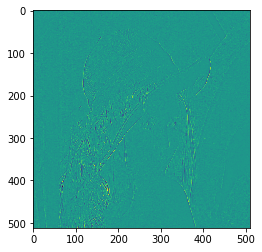

In [55]:
grad2_x, grad2_y = Laplacien1(f)

plt.imshow(grad2_x)
plt.show()
plt.imshow( grad2_y)
plt.show()



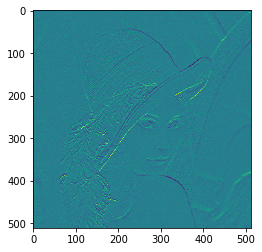

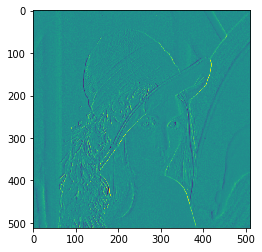

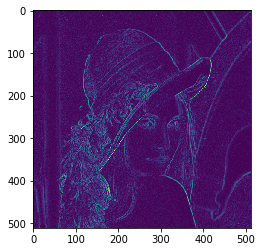

In [94]:
grad_x, grad_y, magnitude = grad(femme)
plt.imshow(grad_x)
plt.show()
plt.imshow(grad_y)
plt.show()
plt.imshow(magnitude)
plt.show()

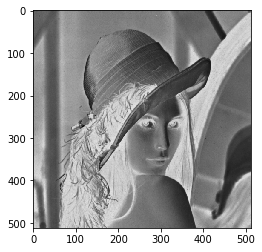

In [117]:
#INVERSION DE CONTRASTE 


femme = f =misc.imread('lena.bmp',flatten=False, mode= 'RGB')
femme= femme / 255
inv_femme = 1- femme 
plt.imshow(inv_femme)
plt.show()

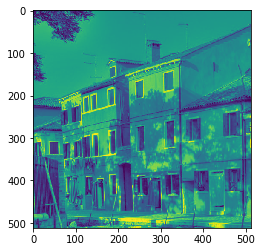

(512, 512)


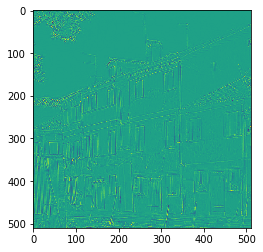

[[  1.23029604e-04   2.61437908e-04   1.64039472e-04 ...,   3.07574010e-05
   -2.56311675e-05   3.07574010e-05]
 [  2.35806741e-04   1.07650903e-04   1.79418172e-04 ...,   0.00000000e+00
    0.00000000e+00  -1.02524670e-05]
 [  2.05049340e-05  -1.69165705e-04   9.73984365e-05 ...,  -3.07574010e-05
    3.07574010e-05   0.00000000e+00]
 ..., 
 [  1.69165705e-04  -5.48506984e-04   4.86992182e-04 ...,   6.81789055e-04
    5.63885685e-04   2.56311675e-04]
 [  3.69088812e-04  -5.07497116e-04   6.51031654e-04 ...,  -1.02524670e-05
    9.73984365e-05   1.43534538e-04]
 [  6.92041522e-04  -6.30526720e-04   6.61284121e-04 ...,  -3.43457644e-04
   -1.43534538e-04  -1.12777137e-04]]


In [8]:

def Laplacien2(u):
    lap= np.zeros((u.shape))
    print(u.shape)
    dim1, dim2 = u.shape
    for x in range(1,dim1-1):
        for y in range(1,dim2-1):
                lap[x,y] =u[x+1,y]+  u[x-1,y ] + u[x, y-1]+u[x, y+1]- 4*u[x,y]
    lap= lap[1:-1,1:-1]
    plt.imshow(lap)
    plt.show()
    return lap

f = np.mean(f,axis=2)
plt.imshow(f)
plt.show()
print(Laplacien2(f))

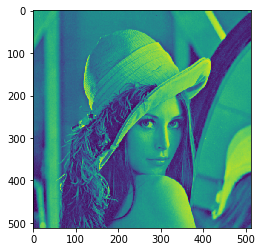

(512, 512)


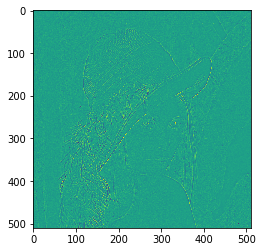

[[ 0.         -0.00392157  0.00784314 ..., -0.01176471 -0.05490196
  -0.04705882]
 [ 0.         -0.00392157  0.00784314 ..., -0.01176471 -0.05490196
  -0.04705882]
 [ 0.         -0.00392157  0.00784314 ..., -0.01176471 -0.05490196
  -0.04705882]
 ..., 
 [ 0.03529412 -0.02352941 -0.01568627 ..., -0.05882353 -0.05098039  0.        ]
 [ 0.04313725 -0.01960784  0.06666667 ...,  0.         -0.03921569
   0.01960784]
 [ 0.03921569 -0.07843137  0.07058824 ...,  0.03137255 -0.01176471
  -0.01176471]]


In [9]:
femme = f =misc.imread('lena.bmp',flatten=False, mode= 'RGB')
femme= femme / 255
femme = np.mean(femme,axis=2)
plt.imshow(femme)
plt.show()
print(Laplacien2(femme))
